Toyota Exploratory Data Analysis
In this notebook , toyota data set has been explored to know more about data

#### Import required libraries and packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [5]:
df = pd.read_csv("toyota.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3


#### Check for missing values, data types of the columns

In [16]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


None

#### Create a function to find the number of observations for unique value in a column of a DataFrame

In [17]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [18]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')
engineSize_count= unique_val_count(df, 'engineSize')

In [19]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

#### Create a function to show the number of observations for each unique value in a column using a barplot

In [20]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Percent of car present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

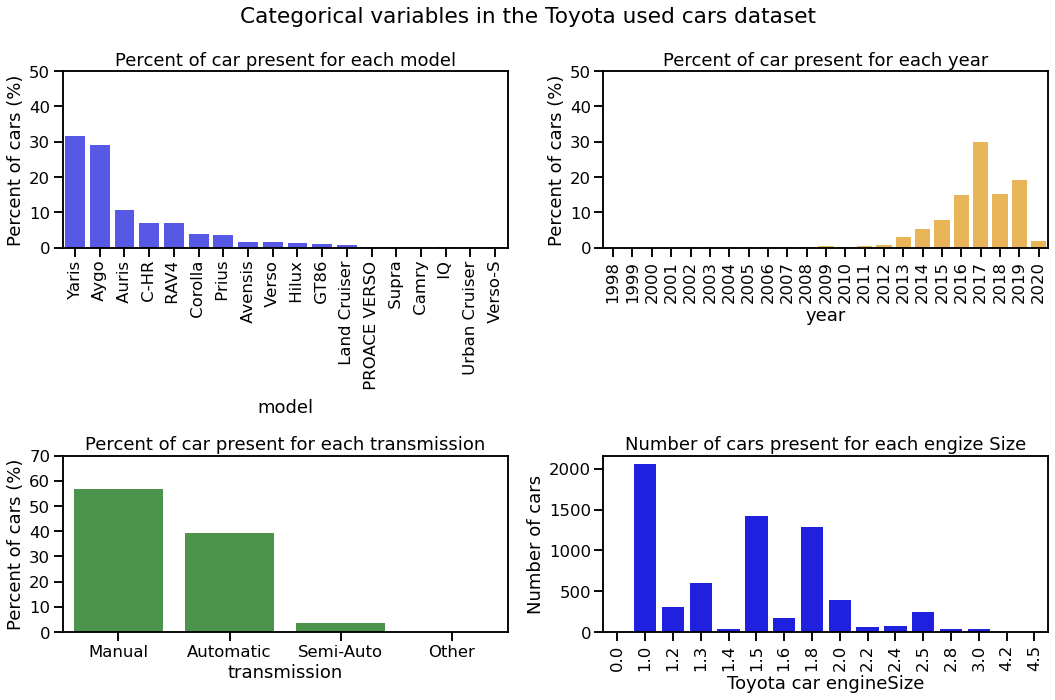

In [21]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
sns.barplot(x='engineSize', y='No_of_cars', data=engineSize_count, color='blue', alpha=1)
plt.title("Number of cars present for each engize Size")
plt.xlabel("Toyota car engineSize")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

plt.suptitle("Categorical variables in the Toyota used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

#### Find the relation between the numerical variables by Scatterplot

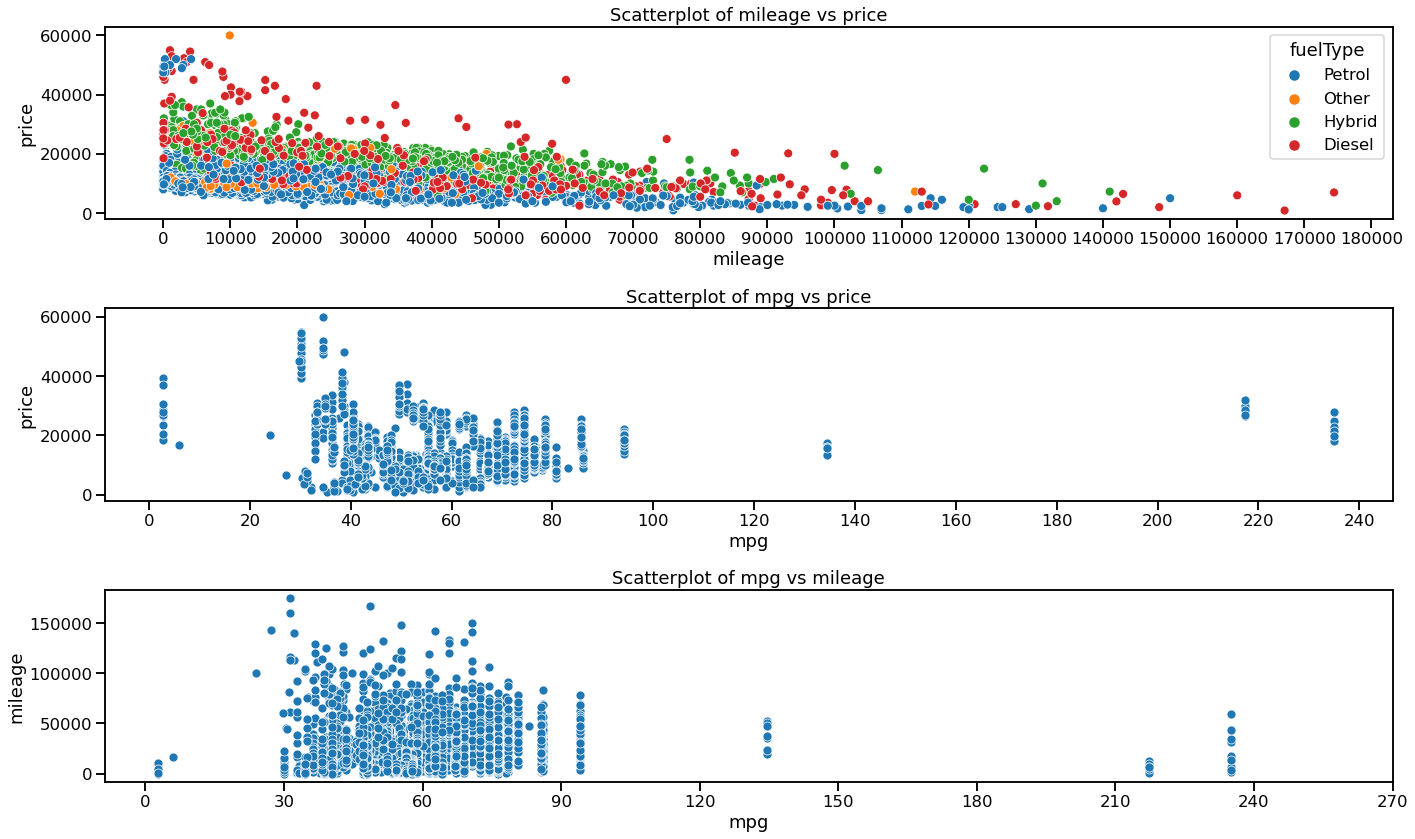

In [22]:

plt.figure(figsize=(20,12))

# mileage vs price
plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df,hue='fuelType')
plt.xticks(np.arange(0, 190000, step=10000))
plt.title("Scatterplot of mileage vs price")

# mpg vs price
plt.subplot(3,1,2)
sns.scatterplot(x='mpg', y='price', data=df)
plt.xticks(np.arange(0, 260, step=20))

plt.title("Scatterplot of mpg vs price")


# engineSize vs price
plt.subplot(3,1,3)
sns.scatterplot(x='mpg', y='mileage', data=df)
plt.xticks(np.arange(0, 300, step=30))

plt.title("Scatterplot of mpg vs mileage")

plt.tight_layout()
plt.show()

This scatterplot helps us to understand the relation between the numerical attributes of data.From the 1st plot we see most of the car prices between 10000 to 35000.And mileage between 0 to 70000.

#### Creating a trend line

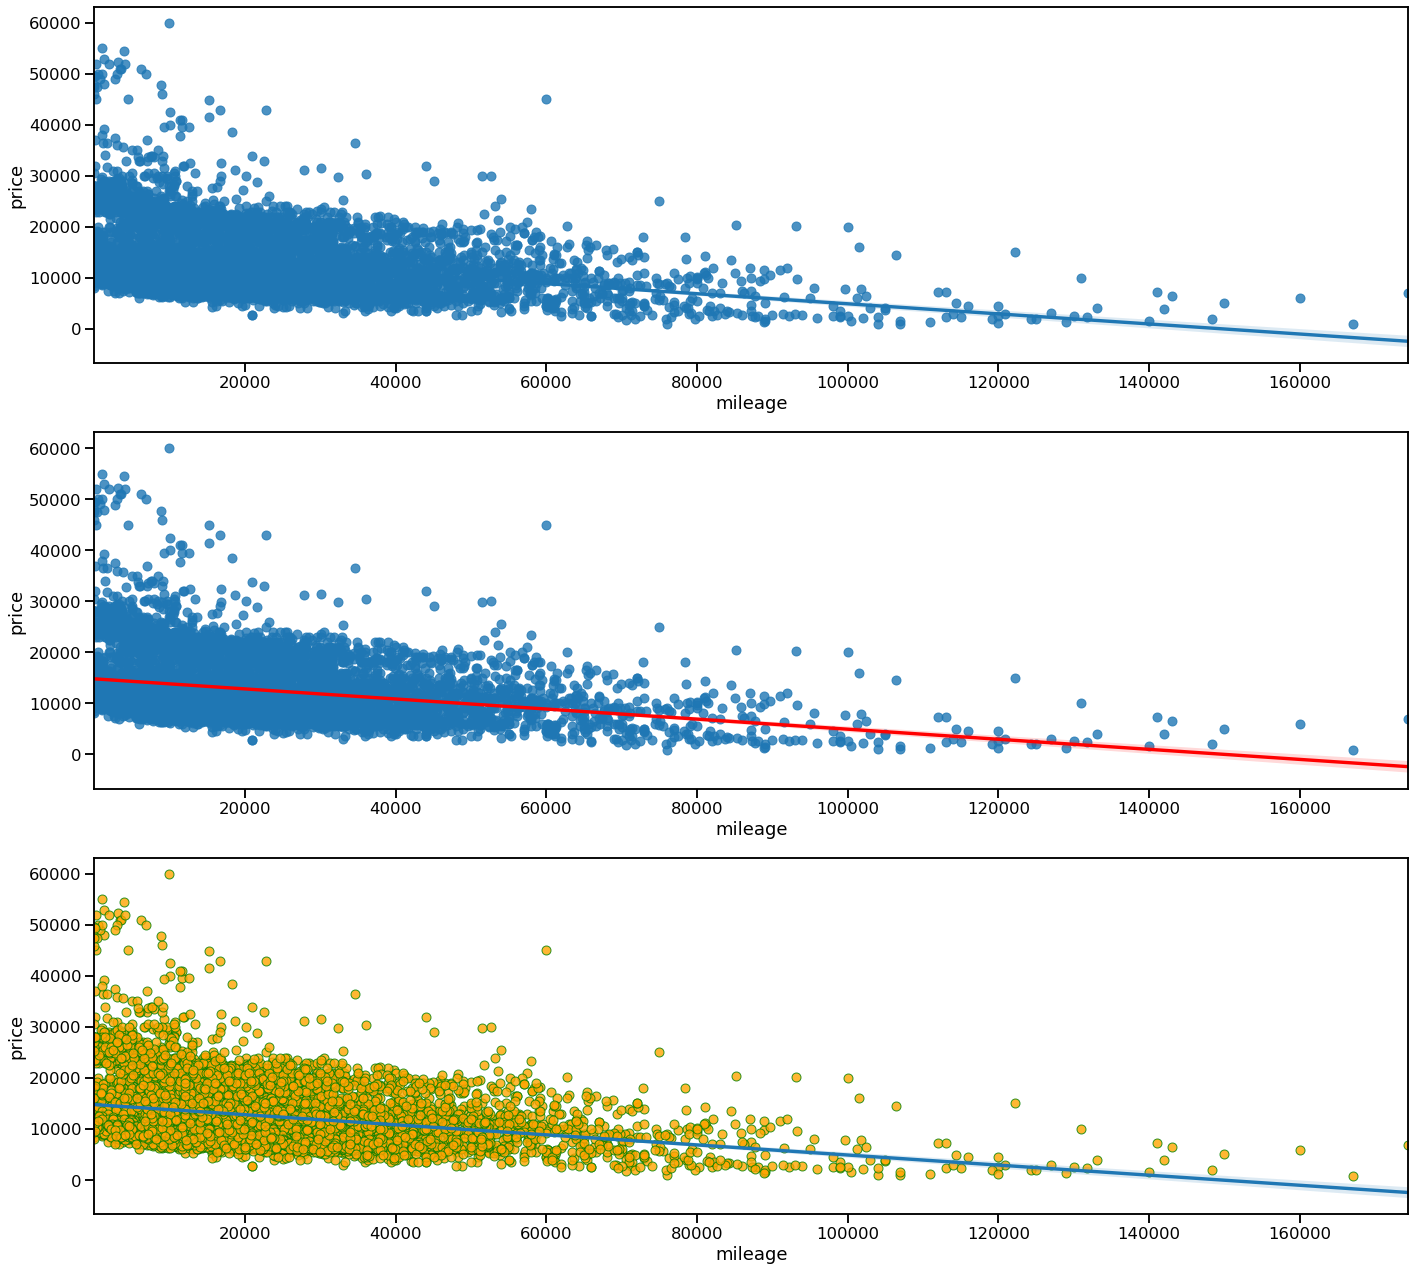

In [23]:

plt.figure(figsize=(20,18))
plt.subplot(3,1,1)
sns.regplot(x='mileage', y='price', data=df)

# changing the color of the trend line
plt.subplot(3,1,2)
sns.regplot(x='mileage', y='price', data=df, line_kws={'color':'r'})

# changing the color of the scatter plot
plt.subplot(3,1,3)
sns.regplot(x='mileage', y='price', data=df,
            scatter_kws={'color':'orange', 'edgecolor':'green'})

plt.tight_layout()
plt.show()

From this plot we see, car prices mostly 10000 to 30000. Interestingly , low price car has largest mileage.

In [25]:
#### Histogram

Text(0.5, 1.0, 'row = 1, column = 3, position = 3')

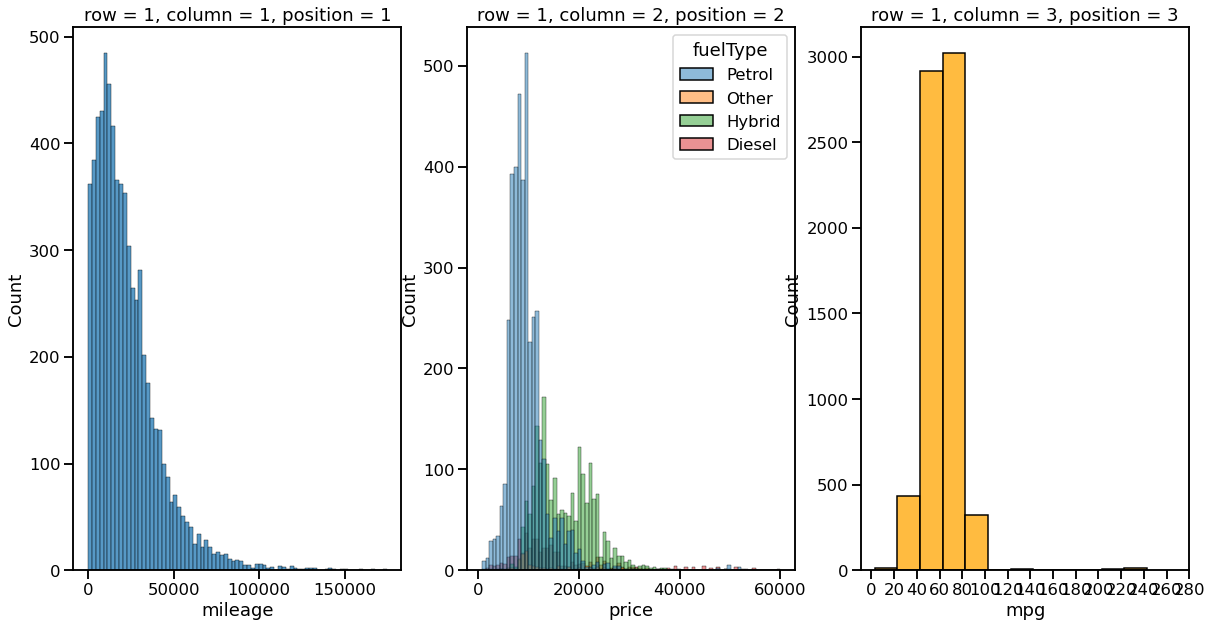

In [26]:

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.histplot(data=df, x='mileage')
plt.title("row = 1, column = 1, position = 1")

plt.subplot(1,3,2)
sns.histplot(data=df, x='price', hue='fuelType')
plt.title("row = 1, column = 2, position = 2")

plt.subplot(1,3,3)
sns.histplot(data=df, x='mpg', binwidth=20,color='orange')
plt.xticks(np.arange(0, 300, step=20))

plt.title("row = 1, column = 3, position = 3")

From 1st image we see, there is more car in mileage range 0 to 50000.From 2nd image we see, most of the car runs with petrol.

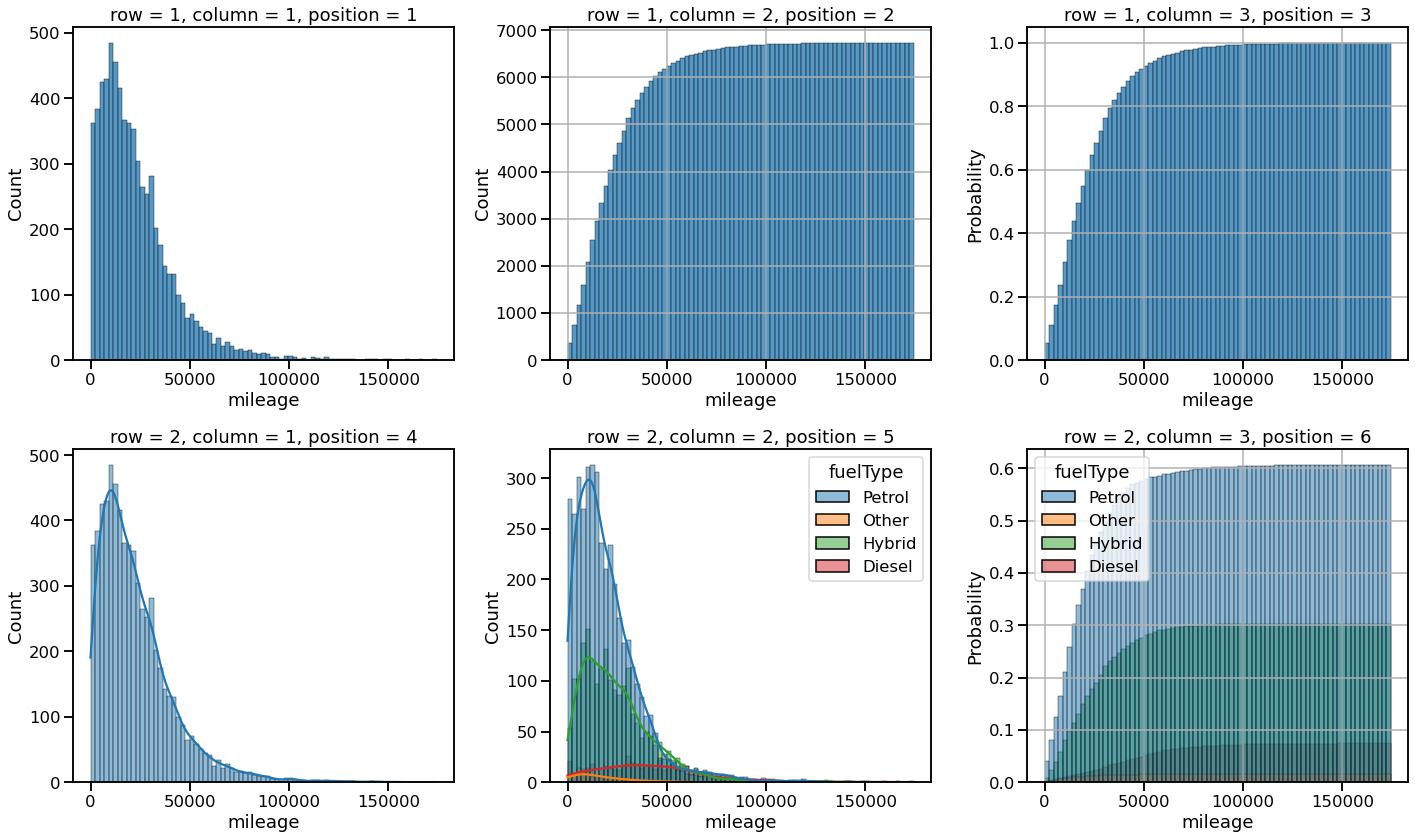

In [27]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(data=df, x='mileage')
plt.title("row = 1, column = 1, position = 1")



plt.subplot(2,3,2)
sns.histplot(data=df, x='mileage', cumulative=True)
plt.grid()
plt.title("row = 1, column = 2, position = 2")



plt.subplot(2,3,3)
sns.histplot(data=df, x='mileage',  cumulative=True, stat='probability')
plt.grid()
plt.title("row = 1, column = 3, position = 3")



plt.subplot(2,3,4)
sns.histplot(data=df, x='mileage',  kde=True)
plt.title("row = 2, column = 1, position = 4")



plt.subplot(2,3,5)
sns.histplot(data=df, x='mileage',  kde=True, hue='fuelType')
plt.title("row = 2, column = 2, position = 5")



plt.subplot(2,3,6)
sns.histplot(data=df, x='mileage', cumulative=True, stat='probability', hue='fuelType')
plt.grid()
plt.title("row = 2, column = 3, position = 6")

plt.tight_layout()
plt.show()

From this histograms above , we find some idea about ranges and with hue attribute we can see petrol car has largest mileage.And last image shows , distribution proportion.

ECDF plot

Text(0.5, 1.0, 'row = 1, column = 3, position = 3')

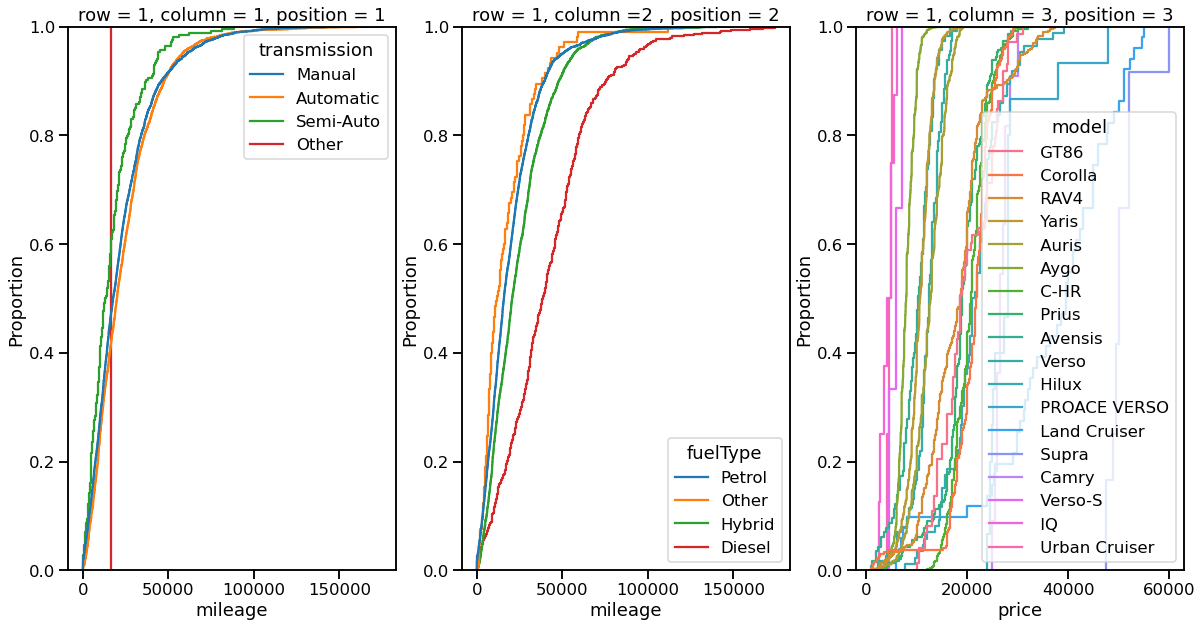

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)

sns.ecdfplot(data=df, x="mileage",hue="transmission")
plt.title("row = 1, column = 1, position = 1")

plt.subplot(1,3,2)

sns.ecdfplot(data=df, x="mileage", hue="fuelType")
plt.title("row = 1, column =2 , position = 2")

plt.subplot(1,3,3)
sns.ecdfplot(data=df, x="price", hue="model")
plt.title("row = 1, column = 3, position = 3")

From the first ecdf plot, All cars get the almost same mileage. From 2nd image , we can see disel type car has greater mileage.And from 3rd image , we can see Supra car is comparatively high in price.

Box Plot

In [1]:
#method to seperate numerical column from data set
def separate_num_cols(dataframe):

    # create an empty list to keep the numeric columns
    num_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64') | (dataframe[col].dtypes == 'float64'):
            num_cols.append(col)
        
    return num_cols

In [7]:
numeric_cols = separate_num_cols(df)

print(numeric_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


Boxplot for numerical columns

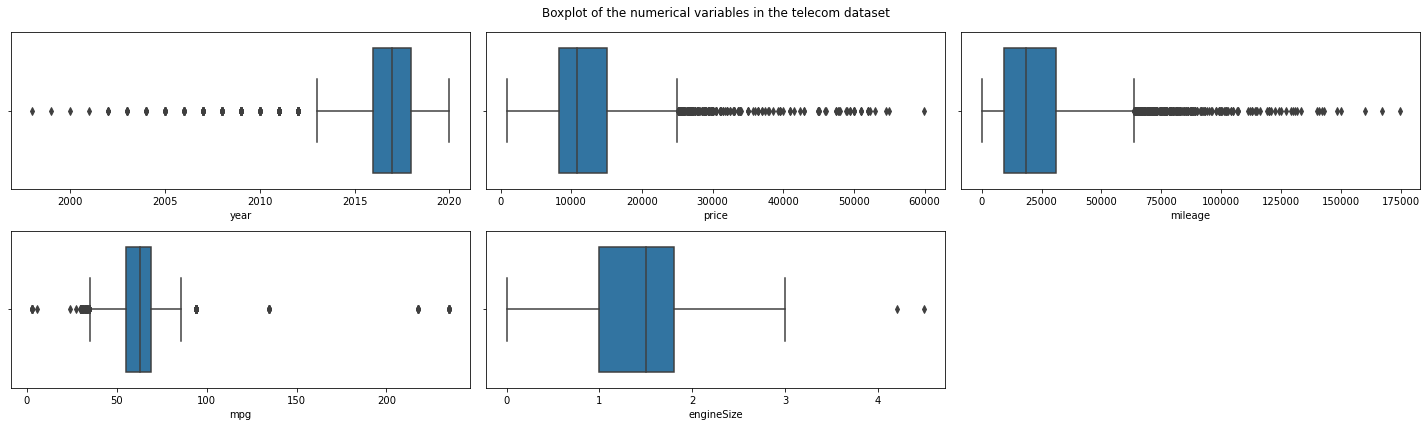

In [17]:
plt.figure(figsize=(20,6))
for index in range(len(numeric_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=df[numeric_cols[index]])

plt.suptitle("Boxplot of the numerical variables in the telecom dataset")
plt.tight_layout()
plt.show()

From the above figures we can see , most of the car buyed between 2016 to 2018.Prices mostly 8000 to 15000.And engine size between 1 and 2

#### adding categorical features in the boxplot

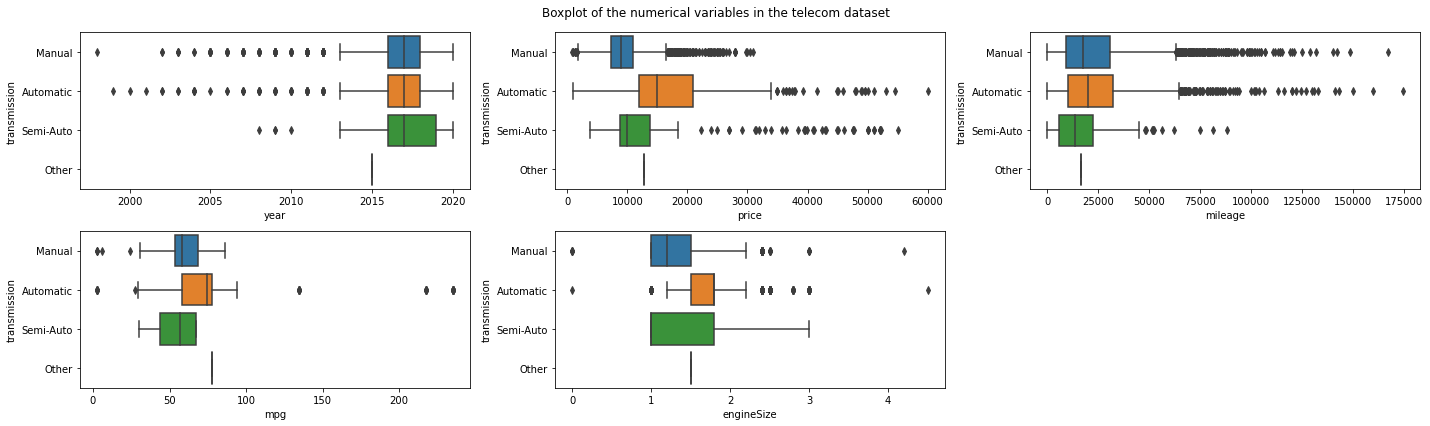

In [18]:
plt.figure(figsize=(20,6))
for index in range(len(numeric_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=df[numeric_cols[index]], y=df['transmission'])

plt.suptitle("Boxplot of the numerical variables in the telecom dataset")
plt.tight_layout()
plt.show()

From above figure we can see, semi-auto car buy period is larger.Price of auto car is highest,than semi-auto and manual.Auto and manual car has same range of milege.Also , semi-auto cars engine size vary.

#### adding categorical features (hue) in the boxplot

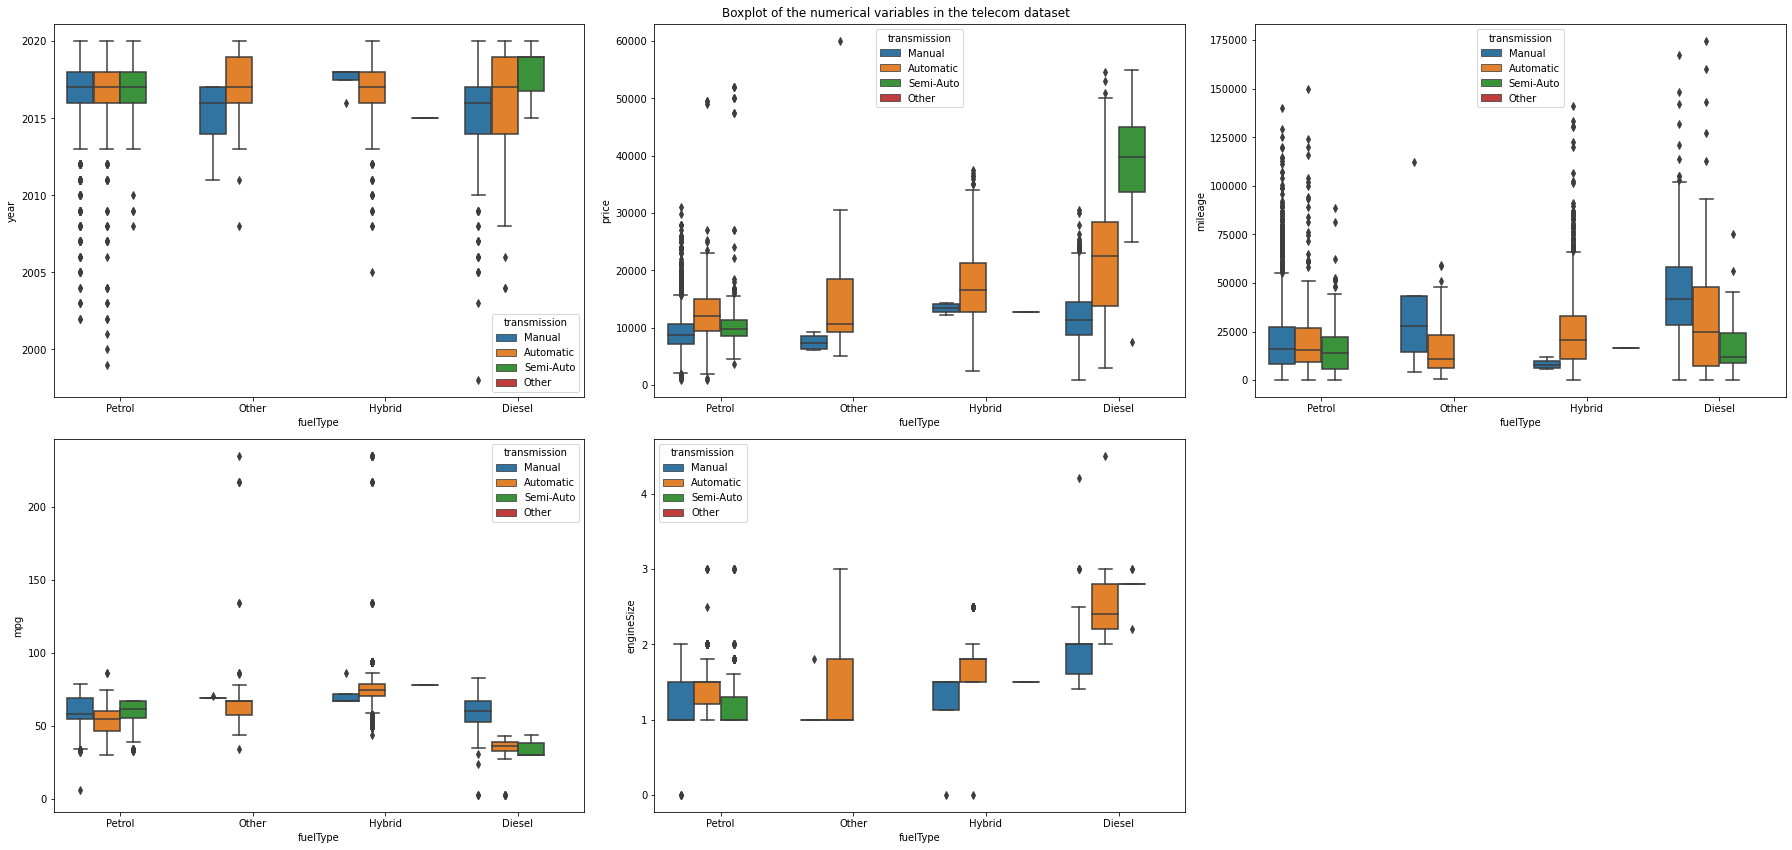

In [20]:
plt.figure(figsize=(25,12))
for index in range(len(numeric_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=df[numeric_cols[index]], x=df['fuelType'], hue=df['transmission'])

plt.suptitle("Boxplot of the numerical variables in the telecom dataset")
plt.tight_layout()
plt.show()

From the figure we can see, auto and semi auto car is sold recently.With disel type car semi auto is most costly than auto.Manual is cheaper.

violinplot 

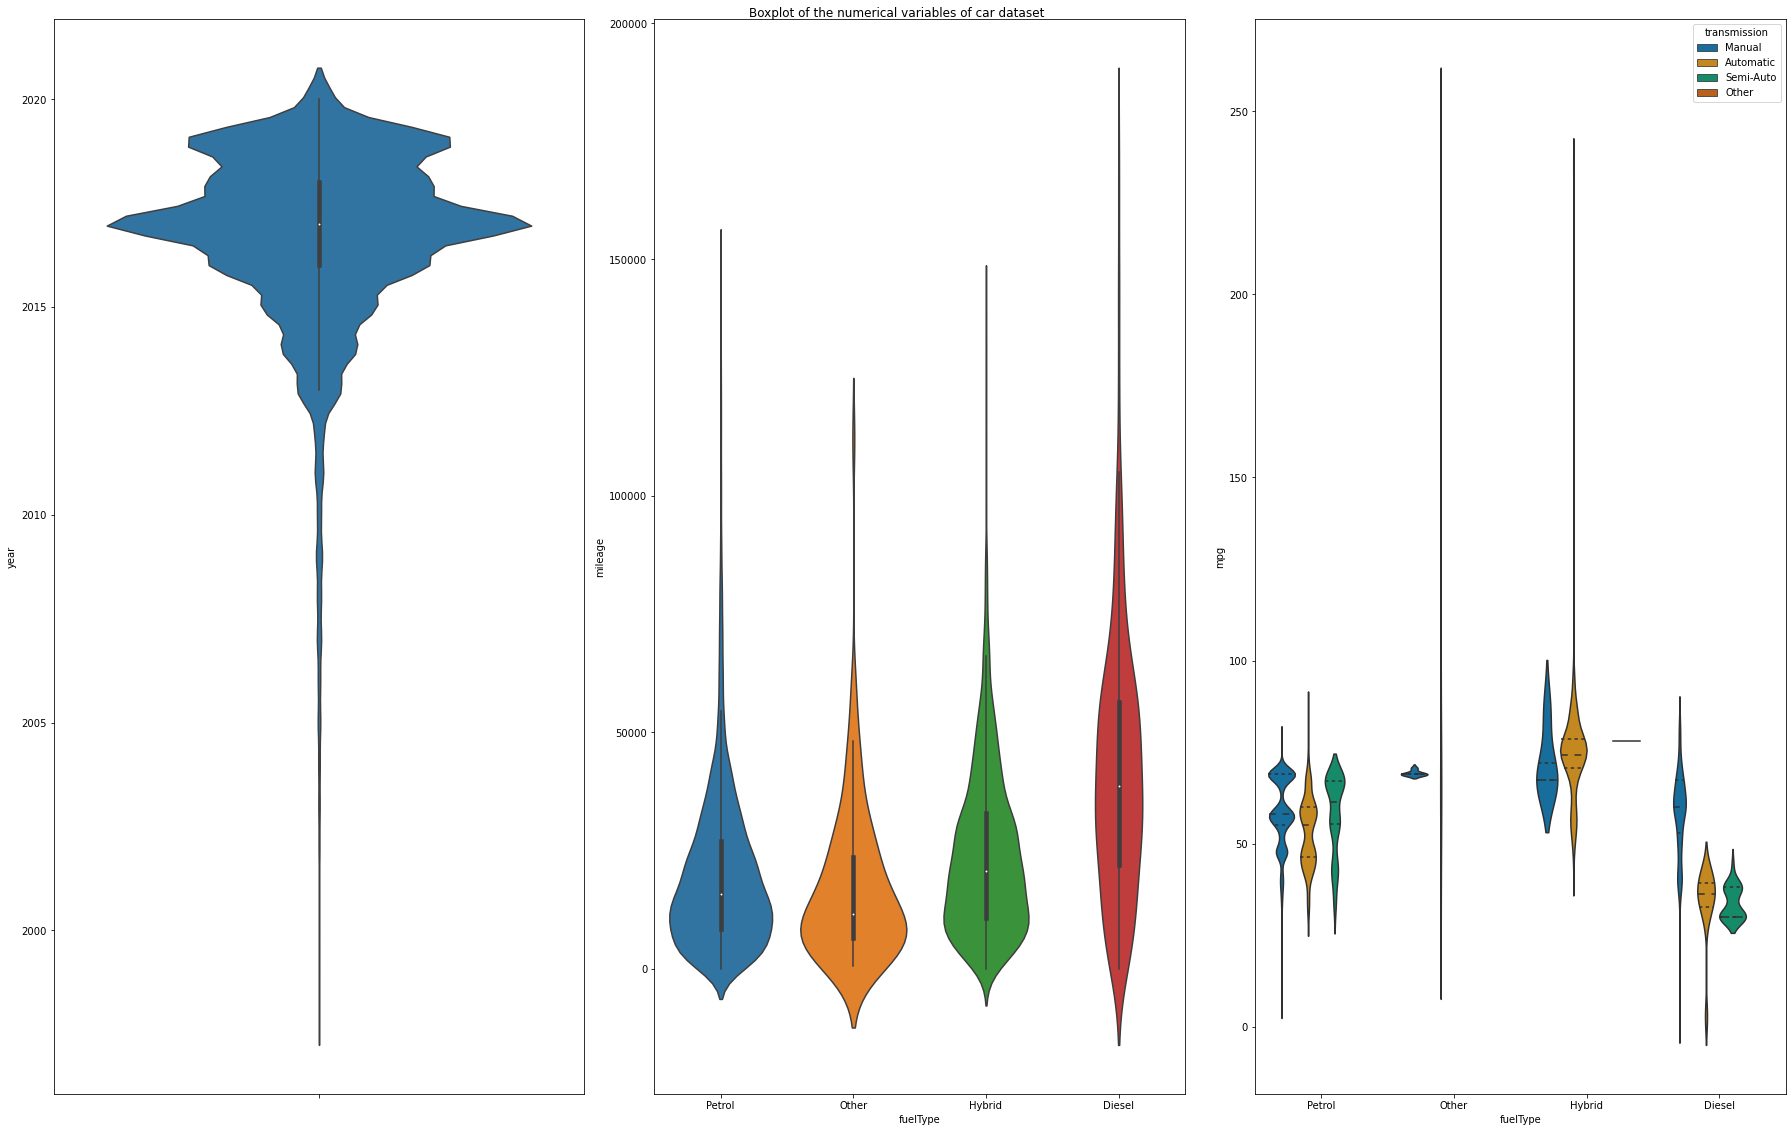

In [34]:
plt.figure(figsize=(25,16))

# row 1, column 3
plt.subplot(1,3,1)
sns.violinplot(y=df['year'])

# row 2, column 1
plt.subplot(1,3,2)
sns.violinplot(y=df['mileage'], x=df['fuelType'])

# row 3, column 3
plt.subplot(1,3,3)
sns.violinplot(y=df['mpg'], x=df['fuelType'], hue=df['transmission'], 
            palette="colorblind", inner="quartile")

plt.suptitle("Boxplot of the numerical variables of car dataset")
plt.tight_layout()
plt.show()

From the above violin plot we can see, most of the car sold between 2012 to 2022.All of the car mileage almost same time,but diesel type has longest mileage.And hybrid var has large mpg.